___

In [13]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [14]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [15]:
t0 = time.perf_counter() 

In [16]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

## 1. Load the dataset

In [17]:
cols = [
     'MONTH',
     'DAY_OF_MONTH',
     'DAY_OF_WEEK',
     'OP_UNIQUE_CARRIER',
# For the time being, 'TAIL_NUM' will be disregarded due to its high cardinality  (~ 4500) and low expected added value    
#      'TAIL_NUM',
     'ORIGIN',
     'DEST',
#      'CRS_DEP_TIME', # Redundant having the 'DEP_ARR_hour' feature
     'DEP_TIME_hour',
#      'DEP_TIME',
#      'DEP_DELAY',
#      'DEP_DEL15',
#      'TAXI_OUT',
     'TAXI_OUT_median',
#      'TAXI_IN',
     'TAXI_IN_median',
#      'CRS_ARR_TIME', # Redundant having the 'ARR_ARR_hour' feature
     'ARR_TIME_hour', 
#      'ARR_TIME',   
#      'ARR_DELAY',
     'ARR_DEL15', # → Target !!
#      'CANCELLED',
     'CRS_ELAPSED_TIME',
     'DISTANCE',
     'DISTANCE_GROUP',
#      'CARRIER_DELAY',
#      'WEATHER_DELAY',
#      'NAS_DELAY',
#      'SECURITY_DELAY',
#      'LATE_AIRCRAFT_DELAY',
]

In [18]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT",
                                           "AL_OTP_MVP_Preprocessed_19_v2_clean.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\AL_OTP_MVP_Preprocessed_19_v2_clean.csv'

In [19]:
cols_dtypes = {
               'MONTH' : 'category',
               'DAY_OF_MONTH' : 'category',
               'DAY_OF_WEEK' : 'category',
               'OP_UNIQUE_CARRIER' : 'category',
               'ORIGIN' : 'category',
               'DEST' : 'category',
               'DEP_TIME_hour' : 'category',
               'TAXI_OUT_median' : 'int64',
               'TAXI_IN_median' : 'int64',
               'ARR_TIME_hour' : 'category', 
               'ARR_DEL15' : 'int32', # → Target !!
               'CRS_ELAPSED_TIME' : 'int64',
               'DISTANCE' : 'int64',
               'DISTANCE_GROUP' : 'category'
               }

In [20]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
                     usecols=cols,
                     low_memory = False)

Wall time: 17.7 s


In [21]:
# Cast types in accordance to previously defined dictionary:
df_all = df_all.astype(cols_dtypes)
# Display DF columns according to 'cols' order:
df_all = df_all[cols]
df_all

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,3,4,9E,TYS,ATL,11,15,8,12,1,70,152,1
1,1,4,5,9E,TYS,ATL,11,15,8,12,1,70,152,1
2,1,5,6,9E,ATL,SGF,9,17,5,10,0,121,563,3
3,1,6,7,9E,ATL,SGF,9,17,5,10,0,123,563,3
4,1,7,1,9E,ATL,SGF,9,17,5,10,0,123,563,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268227,12,31,2,B6,MCO,SWF,13,15,6,16,1,163,989,4
7268228,12,31,2,B6,DCA,BOS,14,15,6,15,0,90,399,2
7268229,12,31,2,B6,PHL,BOS,7,17,6,8,0,85,280,2
7268230,12,31,2,B6,BOS,SJU,8,16,5,13,0,242,1674,7


In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268232 entries, 0 to 7268231
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   MONTH              category
 1   DAY_OF_MONTH       category
 2   DAY_OF_WEEK        category
 3   OP_UNIQUE_CARRIER  category
 4   ORIGIN             category
 5   DEST               category
 6   DEP_TIME_hour      category
 7   TAXI_OUT_median    int64   
 8   TAXI_IN_median     int64   
 9   ARR_TIME_hour      category
 10  ARR_DEL15          int32   
 11  CRS_ELAPSED_TIME   int64   
 12  DISTANCE           int64   
 13  DISTANCE_GROUP     category
dtypes: category(9), int32(1), int64(4)
memory usage: 325.8 MB


## 2. Dataset overview

In [28]:
def val_freq(col='', df_all=df_all):
    i = 0
    for v in df_all[col].value_counts().sort_index():
        print("{} : {} records ({:.2f}%)" \
              .format(df_all[col].value_counts().sort_index().index[i], v,  v / len(df_all) * 100))
        i += 1

In [29]:
%%time

for col in df_all.columns:
    print(col, ':', df_all[col].nunique(), 'unique values')
    if df_all[col].nunique() < 50:
        val_freq(col)
    print("")

MONTH : 12 unique values
1 : 565963 records (7.79%)
2 : 516314 records (7.10%)
3 : 618505 records (8.51%)
4 : 596020 records (8.20%)
5 : 621339 records (8.55%)
6 : 620887 records (8.54%)
7 : 643781 records (8.86%)
8 : 645351 records (8.88%)
9 : 594716 records (8.18%)
10 : 629637 records (8.66%)
11 : 597107 records (8.22%)
12 : 618612 records (8.51%)

DAY_OF_MONTH : 31 unique values
1 : 236456 records (3.25%)
2 : 232030 records (3.19%)
3 : 237234 records (3.26%)
4 : 237920 records (3.27%)
5 : 235399 records (3.24%)
6 : 240084 records (3.30%)
7 : 238684 records (3.28%)
8 : 244481 records (3.36%)
9 : 236163 records (3.25%)
10 : 242425 records (3.34%)
11 : 242556 records (3.34%)
12 : 238294 records (3.28%)
13 : 238808 records (3.29%)
14 : 239433 records (3.29%)
15 : 246213 records (3.39%)
16 : 237532 records (3.27%)
17 : 241404 records (3.32%)
18 : 243971 records (3.36%)
19 : 236751 records (3.26%)
20 : 235828 records (3.24%)
21 : 242615 records (3.34%)
22 : 245697 records (3.38%)
23 : 238

In [23]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e4)

# The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
df = delayed.append(ontime)

# Get dummies for the categorical features:
df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(ontime), 100*len(ontime)/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(delayed), 100*len(delayed)/len(df)))

On-time flights:    5000 (50.00%)
Delayed flights:    5000 (50.00%)


### Train / Test / Validation split
Break the dataset into three blocks:
1. Training (70%)
2. Test (15%)
3. Validation (15%)

In [24]:
# Divide the data:
df_train = df.sample(frac=0.7)
df_test_valid = df.drop(df_train.index)
df_test = df_test_valid.sample(frac=0.5)
df_valid = df_test_valid.drop(df_test.index)

print("Total dataset:      {:7d} ({:6.2f}%)".format(len(df), 100*len(df)/len(df)))
print("Training dataset:   {:7d} ( {:5.2f}%)".format(len(df_train), 100*len(df_train)/len(df)))
print("Test dataset:       {:7d} ( {:5.2f}%)".format(len(df_test), 100*len(df_test)/len(df)))
print("Validation dataset: {:7d} ( {:5.2f}%)".format(len(df_valid), 100*len(df_valid)/len(df)))

Total dataset:        10000 (100.00%)
Training dataset:      7000 ( 70.00%)
Test dataset:          1500 ( 15.00%)
Validation dataset:    1500 ( 15.00%)


### Feature analysis

[Dealing with categorical features with high cardinality: Target Encoding](https://medium.com/@kr.vishwesh54/dealing-with-categorical-features-with-high-cardinality-target-encoding-baa9298bf257)

In [25]:
X_train = df_train.drop('ARR_DEL15', axis=1)
X_test = df_test.drop('ARR_DEL15', axis=1)
X_valid = df_valid.drop('ARR_DEL15', axis=1)

X_train.sample(5)

,TAXI_OUT_median,TAXI_IN_median,CRS_ELAPSED_TIME,DISTANCE,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,DAY_OF_MONTH_5,DAY_OF_MONTH_6,DAY_OF_MONTH_7,DAY_OF_MONTH_8,DAY_OF_MONTH_9,DAY_OF_MONTH_10,DAY_OF_MONTH_11,DAY_OF_MONTH_12,DAY_OF_MONTH_13,DAY_OF_MONTH_14,DAY_OF_MONTH_15,DAY_OF_MONTH_16,DAY_OF_MONTH_17,DAY_OF_MONTH_18,DAY_OF_MONTH_19,DAY_OF_MONTH_20,DAY_OF_MONTH_21,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_ATY,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BFM,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BJI,ORIGIN_BKG,ORIGIN_BLI,ORIGIN_BLV,ORIGIN_BMI,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BPT,ORIGIN_BQK,ORIGIN_BQN,ORIGIN_BRD,ORIGIN_BRO,ORIGIN_BRW,ORIGIN_BTM,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CDC,ORIGIN_CDV,ORIGIN_CGI,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CIU,ORIGIN_CKB,ORIGIN_CLE,ORIGIN_CLL,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_CMI,ORIGIN_CMX,ORIGIN_CNY,ORIGIN_COD,ORIGIN_COS,ORIGIN_COU,ORIGIN_CPR,ORIGIN_CRP,ORIGIN_CRW,ORIGIN_CSG,ORIGIN_CVG,ORIGIN_CWA,ORIGIN_CYS,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DBQ,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DHN,ORIGIN_DLG,ORIGIN_DLH,ORIGIN_DRO,ORIGIN_DRT,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_DVL,ORIGIN_EAR,ORIGIN_EAU,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_EKO,ORIGIN_ELM,ORIGIN_ELP,ORIGIN_ERI,ORIGIN_ESC,ORIGIN_EUG,ORIGIN_EVV,ORIGIN_EWN,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAT,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLG,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_FSM,ORIGIN_FWA,ORIGIN_GCC,ORIGIN_GCK,ORIGIN_GEG,ORIGIN_GFK,ORIGIN_GGG,ORIGIN_GJT,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRI,ORIGIN_GRK,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GST,ORIGIN_GTF,ORIGIN_GTR,ORIGIN_GUC,ORIGIN_GUM,ORIGIN_HDN,ORIGIN_HGR,ORIGIN_HHH,ORIGIN_HIB,ORIGIN_HLN,ORIGIN_HNL,ORIGIN_HOB,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HRL,ORIGIN_HSV,ORIGIN_HTS,ORIGIN_HVN,ORIGIN_HYA,ORIGIN_HYS,ORIGIN_IAD,ORIGIN_IAG,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_IDA,ORIGIN_ILM,ORIGIN_IMT,ORIGIN_IND,ORIGIN_INL,ORIGIN_ISN,ORIGIN_ISP,ORIGIN_ITH,ORIGIN_ITO,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JLN,ORIGIN_JMS,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_KTN,ORIGIN_LAN,ORIGIN_LAR,ORIGIN_LAS,ORIGIN_LAW,ORIGIN_LAX,ORIGIN_LBB,ORIGIN_LBE,ORIGIN_LBF,ORIGIN_LBL,ORIGIN_LCH,ORIGIN_LCK,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_LNK,ORIGIN_LRD,ORIGIN_LSE,ORIGIN_LWB,ORIGIN_LWS,ORIGIN_LYH,ORIGIN_MAF,ORIGIN_MBS,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEI,ORIGIN_MEM,ORIGIN_MFE,ORIGIN_MFR,ORIGIN_MGM,ORIGIN_MHK,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MKG,ORIGIN_MLB,ORIGIN_MLI,ORIGIN_MLU,ORIGIN_MMH,ORIGIN_MOB,ORIGIN_MOT,ORIGIN_MQT,ORIGIN_MRY,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MVY,ORIGIN_MYR,ORIGIN_OAJ,ORIGIN_OAK,ORIGIN_OGD,ORIGIN_OGG,ORIGIN_OGS,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_OME,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_ORH,ORIGIN_OTH,ORIGIN_OTZ,ORIGIN_OWB,ORIGIN_PAE,ORIGIN_PAH,ORIGIN_PBG,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PGD,ORIGIN_PGV,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_P

In [26]:
y_train = df_train['ARR_DEL15']
y_test = df_test['ARR_DEL15']
y_valid = df_valid['ARR_DEL15']

y_train.sample(5)

772394     1
448894     0
5243944    1
1906101    1
148999     0
Name: ARR_DEL15, dtype: int32

___

In [30]:
%memit

peak memory: 946.65 MiB, increment: 0.06 MiB


#### Transformers

Before building the pipeline, let's split the data into a train and test set so that the performance of the model can be validated.

1. The first step in building the pipeline is to define each transformer type.

In [36]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

Wall time: 107 ms


2. Next, let's use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this, the numeric and categorical columns shall be listed.

In [38]:
%%time

numeric_features = df_train.select_dtypes(include=['number']).drop(['ARR_DEL15'], axis=1).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

Wall time: 20 ms


#### Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case a simple RandomForestClassifier has been used to start with.

In [39]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
#                             confusion_matrix, plot_confusion_matrix

# predictions = clf.predict(X_test)
# probabilities = clf.predict_proba(X_test)

# print(fbeta_score(y_test, predictions, beta=2), f1_score(y_test, predictions), \
#       recall_score(y_test, predictions), precision_score(y_test, predictions), \
#       accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))

# tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
# plt.plot(tpr, fpr)
# plt.plot([0, 1], [0, 1], color='0.3', linestyle='dashed')
# plot_confusion_matrix(clf, X_test, y_test, display_labels=['on-time', 'delayed'])

Wall time: 5.72 s


0.5986666666666667

#### Model selection

**A pipeline can also be used during the model selection process**. The following example code loops through a number of scikit-learn classifiers applying the transformations and training the model.

In [40]:
def clf_metrics(classifier, y_test, predictions):
    print(classifier)
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, predictions, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, predictions)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, predictions)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, predictions)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, predictions)))
    print(confusion_matrix(y_test, predictions))

In [41]:
%%time

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
                            confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    LogisticRegression(solver='sag', max_iter=1000, random_state=0),
#     GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=0), # TARDA MUCHÍSIMO MÁS!!
#     SVC(kernel="linear", C=0.025, probability=True, random_state=0),
#     LinearSVC(C=0.025, kernel='linear', probability=True, dual=False, random_state=0),
# "The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples 
# and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or
# SGDClassifier instead."
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
    ]

# Define the result table as a DataFrame:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for classifier in classifiers:
    t0_clf = time.perf_counter() 
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    probabilities = pipe.predict_proba(X_test)
    
    # Print metrics:
    clf_metrics(classifier, y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test,  probabilities[::,1])
    auc = roc_auc_score(y_test, probabilities[::,1])
    result_table = result_table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)    
    t1_clf = time.perf_counter() - t0_clf
    print("time elapsed: {:7.1f} s\n".format(t1_clf))

# # Set the name of the classifiers as the index labels:
# result_table.set_index('classifiers', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, random_state=0, solver='sag')
F-beta (ß=2) =  0.616
F1 =            0.613
Recall =        0.618
Precision =     0.607
Accuracy =      0.611
[[454 299]
 [285 462]]
time elapsed:    67.5 s

KNeighborsClassifier(n_neighbors=3)
F-beta (ß=2) =  0.534
F1 =            0.529
Recall =        0.537
Precision =     0.521
Accuracy =      0.523
[[384 369]
 [346 401]]
time elapsed:    30.3 s

SVC(C=0.025, probability=True, random_state=0)
F-beta (ß=2) =  0.832
F1 =            0.665
Recall =        1.000
Precision =     0.498
Accuracy =      0.498
[[  0 753]
 [  0 747]]
time elapsed:   287.3 s

DecisionTreeClassifier(random_state=0)
F-beta (ß=2) =  0.506
F1 =            0.513
Recall =        0.502
Precision =     0.524
Accuracy =      0.525
[[413 340]
 [372 375]]
time elapsed:     1.7 s

RandomForestClassifier(random_state=0)
F-beta (ß=2) =  0.611
F1 =            0.604
Recall =        0.616
Precision =     0.594
Accuracy =      0.599
[[438 315]
 [287 460]]
time elaps

In [42]:
result_table

,classifiers,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.005312084993359893, 0.005312...","[0.0, 0.0013386880856760374, 0.004016064257028...",0.641100
1,KNeighborsClassifier,"[0.0, 0.10225763612217796, 0.4900398406374502,...","[0.0, 0.15796519410977242, 0.536813922356091, ...",0.538878
2,SVC,"[0.0, 0.0, 0.0, 0.0026560424966799467, 0.00265...","[0.0, 0.0013386880856760374, 0.005354752342704...",0.574922
3,DecisionTreeClassifier,"[0.0, 0.45152722443559096, 1.0]","[0.0, 0.5020080321285141, 1.0]",0.525240
4,RandomForestClassifier,"[0.0, 0.0, 0.0, 0.00398406374501992, 0.0053120...","[0.0, 0.0013386880856760374, 0.006693440428380...",0.641400
5,AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0026560424966799467, 0.00265...","[0.0, 0.0013386880856760374, 0.005354752342704...",0.643047
6,GradientBoostingClassifier,"[0.0, 0.0, 0.0013280212483399733, 0.0013280212...","[0.0, 0.0013386880856760374, 0.001338688085676...",0.633491


In [43]:
def plot_ROC(result_table):
    '''
    Plot the ROC curves present in the "result_table", which presents the following columns:
    || classifiers(index) || fpr | tpr | auc |
    '''
    # Plot the figure:
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("fpr", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("tpr", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

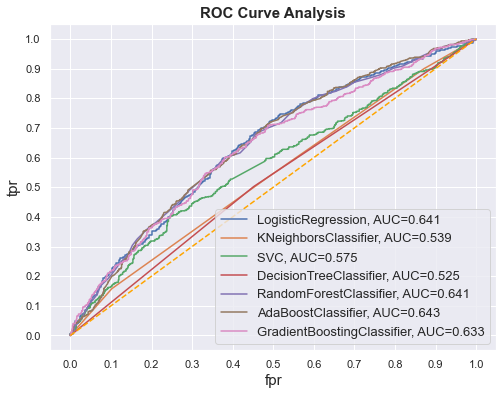

In [46]:
plot_ROC(result_table.set_index('classifiers'))

**The pipeline can also be used in grid search** to find the best performing parameters. To do this, let's first create a parameter grid for the chosen model.

*One important thing to note is that there is a need to append the name given to the classifier part of the pipeline to each parameter name. In the code above its name is ‘classifier’ so 'classifier__' has been added to each parameter.*

Next a grid search object has been created, which includes the original pipeline. When fit is called, the transformations are applied to the data, before a cross-validated grid-search is performed over the parameter grid.

In [47]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [44]:
%%time

# State the model:

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4, 5, 6, 7, 8],
    'classifier__criterion' :['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_rf = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# RS_rf = RandomizedSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_rf.fit(X_train, y_train)  
print(CV_rf.best_params_)    
print(CV_rf.best_score_)
CV_rf_scores = pd.DataFrame(CV_rf.cv_results_)

# {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 500}
# 0.6353221704320445
# Wall time: 7min 19s

{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__n_estimators': 500}
0.6522155245790257
Wall time: 15min 32s


In [48]:
CV_rf_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,1.725911,0.035462,0.184108,0.008775,gini,4,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.636078,0.612038,0.597175,0.636800,0.627557,0.621929,0.015255,32,0.647022,0.613195,0.629423,0.641557,0.649815,0.636202,0.013463,21,0.579125,0.562945,0.558986,0.575450,0.574700,0.570241,0.007821,41,0.732955,0.673295,0.720170,0.724823,0.747518,0.719752,0.025017,19,0.597857,0.572857,0.573571,0.592143,0.594286,0.586143,0.010715,48
1,3.121494,0.014253,0.297627,0.003183,gini,4,auto,500,"{'classifier__criterion': 'gini', 'classifier_...",0.641331,0.611742,0.599920,0.642096,0.630034,0.625025,0.016668,10,0.655535,0.622052,0.626001,0.654112,0.639600,0.639460,0.013837,13,0.580504,0.564162,0.552775,0.586712,0.571429,0.571116,0.011968,39,0.752841,0.693182,0.721591,0.739007,0.726241,0.726572,0.019922,13,0.602143,0.576429,0.566429,0.606429,0.587857,0.587857,0.015092,20
2,1.729738,0.062648,0.198313,0.022919,gini,4,sqrt,200,"{'classifier__criterion': 'gini', 'classifier_...",0.636078,0.612038,0.597175,0.636800,0.627557,0.621929,0.015255,32,0.647022,0.613195,0.629423,0.641557,0.649815,0.636202,0.013463,21,0.579125,0.562945,0.558986,0.575450,0.574700,0.570241,0.007821,41,0.732955,0.673295,0.720170,0.724823,0.747518,0.719752,0.025017,19,0.597857,0.572857,0.573571,0.592143,0.594286,0.586143,0.010715,48
3,3.178723,0.100506,0.299098,0.011690,gini,4,sqrt,500,"{'classifier__criterion': 'gini', 'classifier_...",0.641331,0.611742,0.599920,0.642096,0.630034,0.625025,0.016668,10,0.655535,0.622052,0.626001,0.654112,0.639600,0.639460,0.013837,13,0.580504,0.564162,0.552775,0.586712,0.571429,0.571116,0.011968,39,0.752841,0.693182,0.721591,0.739007,0.726241,0.726572,0.019922,13,0.602143,0.576429,0.566429,0.606429,0.587857,0.587857,0.015092,20
4,1.338287,0.008923,0.183711,0.004241,gini,4,log2,200,"{'classifier__criterion': 'gini', 'classifier_...",0.630490,0.602058,0.601222,0.636779,0.621058,0.618322,0.014513,56,0.645360,0.634056,0.638655,0.665862,0.653664,0.647520,0.011303,4,0.568797,0.562020,0.553015,0.579224,0.560284,0.564668,0.008843,58,0.745739,0.727273,0.755682,0.782979,0.784397,0.759214,0.021969,4,0.587857,0.577857,0.570000,0.604286,0.581429,0.584286,0.011544,52
5,2.220228,0.019150,0.299929,0.002000,gini,4,log2,500,"{'classifier__criterion': 'gini', 'classifier_...",0.636711,0.603401,0.600130,0.641937,0.629197,0.622275,0.017260,29,0.661427,0.635077,0.641577,0.664663,0.658333,0.652216,0.011697,1,0.575789,0.560261,0.553608,0.576642,0.567179,0.566696,0.008883,54,0.776989,0.732955,0.762784,0.784397,0.784397,0.768304,0.019357,2,0.600000,0.576429,0.571429,0.601429,0.590000,0.587857,0.012139,20
6,1.837886,0.017141,0.184609,0.001811,gini,5,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.636845,0.607048,0.592117,0.638908,0.623769,0.619738,0.017890,50,0.643939,0.613666,0.616834,0.645900,0.644959,0.633060,0.014589,31,0.579545,0.570905,0.552928,0.585253,0.577354,0.573197,0.011127,28,0.724432,0.663352,0.697443,0.720567,0.730496,0.707258,0.024642,35,0.597143,0.580000,0.564286,0.602143,0.595000,0.587714,0.013846,23
7,3.517304,0.013647,0.316933,0.008027,gini,5,auto,500,"{'cl

In [50]:
%%time

# State the model:

from sklearn.ensemble import GradientBoostingClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__loss': ['deviance'],
    'classifier__learning_rate': [.1, .2, .3],
    'classifier__n_estimators' : [100, 200, 300],
    'classifier__criterion' : ['mse'],
    'classifier__max_depth' : [3, 4, 5]
}

from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_gb = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_gb.fit(X_train, y_train)  
print(CV_gb.best_params_)    
print(CV_gb.best_score_)
CV_gb_scores = pd.DataFrame(CV_gb.cv_results_)

# {'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
# 0.6097297211201359
# Wall time: 6min 6s

# Con Get-Dummies:
# {'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
# 0.6114671623637427
# Wall time: 41min 58s

{'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
0.6114671623637427
Wall time: 41min 58s


In [35]:
CV_gb_scores[CV_gb_scores['rank_test_F1'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__learning_rate,param_classifier__loss,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,1.36096,0.141959,0.065158,0.013341,mse,0.1,deviance,3,100,"{'classifier__criterion': 'mse', 'classifier__...",0.617971,0.628296,0.624315,0.613496,0.622392,0.621294,0.005123,8,0.609569,0.606905,0.608132,0.608019,0.616024,0.60973,0.003259,1,0.579125,0.590106,0.576536,0.585253,0.588435,0.583891,0.005253,18,0.643392,0.624688,0.643392,0.632628,0.646326,0.638085,0.008167,1,0.586875,0.594375,0.584375,0.590625,0.595625,0.590375,0.004287,9


# Probar a meter datos de meteo

### Validation

In [69]:
CV_rf_best = CV_rf.best_estimator_
CV_rf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'CRS_ELAPSED_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ig

### Feature Importance

In [53]:
# Given a model:
my_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=3,
                                  random_state=0).fit(X_train, y_train)

In [55]:
# Calculate and show permutation importances with the 'eli5' library:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test)

ValueError: feature_names has a wrong length: expected=840, got=1500

The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

In [ ]:
# Calculate and show partial dependence plot:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_delays = pdp.pdp_isolate(model=my_model, dataset=df_train, model_features=feature_names, feature='ARR_DEL15')

# plot it
pdp.pdp_plot(pdp_delays, 'ARR_DEL15')
plt.show()

___

In [41]:
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)

Time elapsed:  3213.8025687


___

### Which metric should be used then?
##### Bear in mind that it's a clear case of imbalanced data

Nomenclature:
- Delayed = Positive
- On-time = Negative 

Considering this:
- False positive (Type I error) → Wrongly classifying an On-time flight as a Delayed flight → Not significantly relevant
- **False negative (Type II error) → Wrongly classifying a Delayed flight as an On-time flight → Highly relevant**

**F-beta** score (\$ F_\beta \$):
![F-beta score](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

Two commonly used values for β are:
- **2 : weighs recall higher than precision**
- 0.5 : weighs recall lower than precision.


<em>Probably most people in the industry would accept that an **OTP of 80%* or above is pretty good***. That’s 4 in 5 flights arriving within 15 minutes of their scheduled arrival time. The very best airlines and airports succeed in punctuality closer to 90% - but they remain the exception rather than the rule.</em>  
(Source: [OAG](https://www.oag.com/on-time-performance-airlines-airports))

The actual data from the 7268232 records comprising the OTP dataset accurately confirm this hypothesis:
```
Delays: 5878979 (80.89%)
On-time: 1389253 (19.11%)
```

In some rare cases, the calculation of Precision or Recall can cause a division by 0. Regarding the precision, this can happen if there are no results inside the answer of an annotator and, thus, the true as well as the false positives are 0. For these special cases, we have defined that **if the true positives, false positives and false negatives are all 0, the precision, recall and F1-measure are 1**. This might occur in cases in which the gold standard contains a document without any annotations and the annotator (correctly) returns no annotations. **If true positives are 0 and one of the two other counters is larger than 0, the precision, recall and F1-measure are 0.**

___